# Investigating depth parameter of min_max strategy, with/without alpha-beta pruning
* Player 1 strategy min_max
* Player 2 strategy: min_max
* Does player 2 get a better advantage with increasing depth?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_no_ab = pd.read_csv('../data/time_min_max_without_alpha_beta.csv')
data_ab = pd.read_csv('../data/time_min_max_with_alpha_beta.csv')

data_no_ab['using_pruning'] = False
data_ab['using_pruning'] = True

data = pd.concat([data_no_ab, data_ab])

In [2]:
depths = range(7)

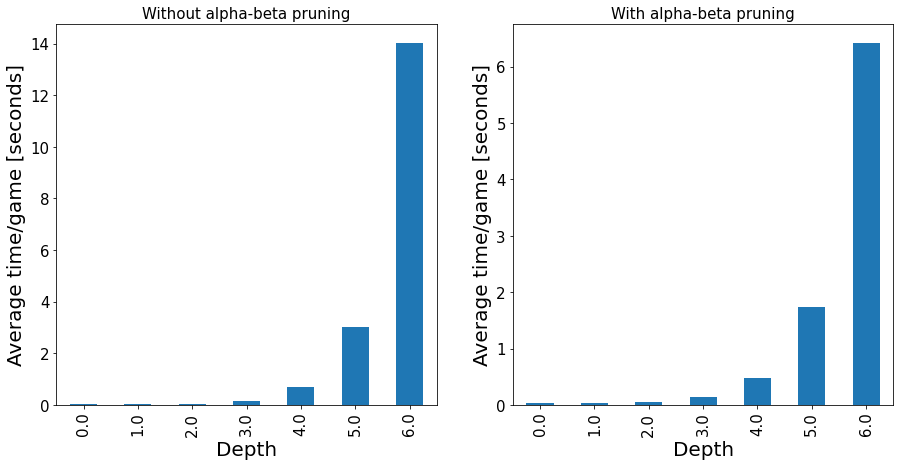

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
data_no_ab.groupby('depth')['game_run_time'].mean().plot(kind='bar', ax=ax[0])
ax[0].set_ylabel('Average time/game [seconds]', fontsize=20)
ax[0].set_xlabel('Depth', fontsize=20)
ax[0].set_title('Without alpha-beta pruning', fontsize=15)
ax[0].tick_params(axis='y', labelsize=15)
ax[0].tick_params(axis='x', labelsize=15)

data_ab.groupby('depth')['game_run_time'].mean().plot(kind='bar', ax=ax[1])
ax[1].set_ylabel('Average time/game [seconds]', fontsize=20)
ax[1].set_xlabel('Depth', fontsize=20)
ax[1].set_title('With alpha-beta pruning', fontsize=15)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].tick_params(axis='x', labelsize=15)

fig.savefig('../plots/minmax_timing.pdf')
fig.savefig('../plots/minmax_timing.png')

plt.show()

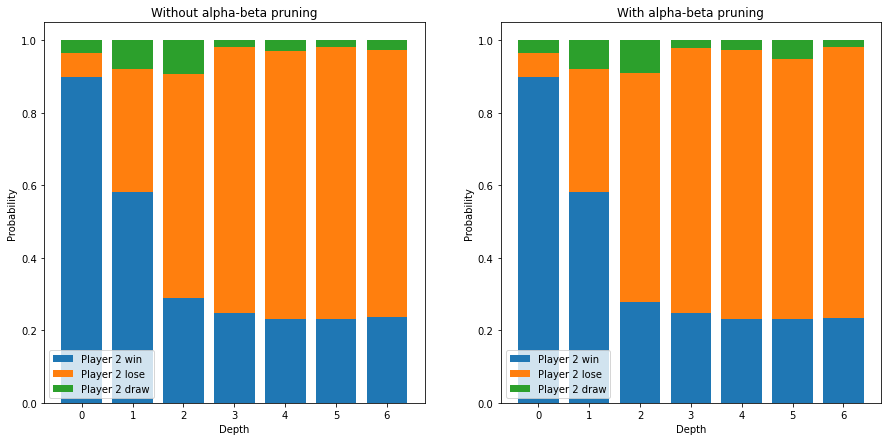

In [4]:
probs_depth_with_ab = pd.DataFrame(columns=['win', 'lose', 'draw'], index=depths, dtype=float)
probs_depth_without_ab = pd.DataFrame(columns=['win', 'lose', 'draw'], index=depths, dtype=float)

for depth in depths:
    view_no_ab = data_no_ab[ data_no_ab['depth'] == depth ]
    norm_no_ab = len(view_no_ab)
    view_ab = data_ab[ data_ab['depth'] == depth ]
    norm_ab = len(view_ab)


    probs_depth_without_ab['win'].loc[depth]  = len(view_no_ab[ view_no_ab['player_2_result'] == 'win' ]) / norm_no_ab
    probs_depth_without_ab['lose'].loc[depth] = len(view_no_ab[ view_no_ab['player_2_result'] == 'lose' ]) / norm_no_ab
    probs_depth_without_ab['draw'].loc[depth] = len(view_no_ab[ view_no_ab['player_2_result'] == 'draw' ]) / norm_no_ab
        
    probs_depth_with_ab['win'].loc[depth]  = len(view_ab[ view_ab['player_2_result'] == 'win' ]) / norm_no_ab
    probs_depth_with_ab['lose'].loc[depth] = len(view_ab[ view_ab['player_2_result'] == 'lose' ]) / norm_no_ab
    probs_depth_with_ab['draw'].loc[depth] = len(view_ab[ view_ab['player_2_result'] == 'draw' ]) / norm_no_ab
    
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].bar(probs_depth_without_ab.index, probs_depth_without_ab['win'],  label='Player 2 win')
ax[0].bar(probs_depth_without_ab.index, probs_depth_without_ab['lose'], label='Player 2 lose', bottom=probs_depth_without_ab['win'])
ax[0].bar(probs_depth_without_ab.index, probs_depth_without_ab['draw'], label='Player 2 draw', bottom=probs_depth_without_ab['win']+probs_depth_without_ab['lose'])

ax[0].set_xlabel('Depth')
ax[0].set_ylabel('Probability')
ax[0].set_title('Without alpha-beta pruning')
ax[0].legend(loc='best')

ax[1].bar(probs_depth_with_ab.index, probs_depth_with_ab['win'],  label='Player 2 win')
ax[1].bar(probs_depth_with_ab.index, probs_depth_with_ab['lose'], label='Player 2 lose', bottom=probs_depth_with_ab['win'])
ax[1].bar(probs_depth_with_ab.index, probs_depth_with_ab['draw'], label='Player 2 draw', bottom=probs_depth_with_ab['win']+probs_depth_with_ab['lose'])

ax[1].set_xlabel('Depth')
ax[1].set_ylabel('Probability')
ax[1].set_title('With alpha-beta pruning')
ax[1].legend(loc='best')

plt.show()

In [5]:
print(probs_depth_with_ab)
print(probs_depth_without_ab)
# probabilities could be different, because moves with the same "min_max" score get pruned away and MinMaxPlayer randomly chooses one of these moves in the no pruning case

     win   lose   draw
0  0.898  0.068  0.034
1  0.582  0.340  0.078
2  0.278  0.632  0.090
3  0.248  0.732  0.020
4  0.230  0.744  0.026
5  0.230  0.718  0.052
6  0.234  0.748  0.018
     win   lose   draw
0  0.898  0.068  0.034
1  0.582  0.340  0.078
2  0.290  0.616  0.094
3  0.248  0.734  0.018
4  0.232  0.738  0.030
5  0.232  0.750  0.018
6  0.236  0.738  0.026
